In [102]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.figure_factory as ff
from prettytable import PrettyTable
from sklearn.preprocessing import RobustScaler

from plotly.subplots import make_subplots


#Modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedKFold
import lightgbm as lgbm
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score      
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import ElasticNet, BayesianRidge
from sklearn.ensemble import AdaBoostRegressor




from catboost import CatBoostRegressor

#from sklego.linear_model import LADRegression
from xgboost import XGBRegressor
from scipy.stats import yeojohnson
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from mlxtend.regressor import StackingCVRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

# **2. Data Collection**

In [103]:
import pandas as pd

# Definisikan nama file
filename = "booking_dataset_2024_06_03.csv"

# Membaca dataset dari file CSV
raw_data = pd.read_csv(filename)
df = raw_data
data_eda =raw_data

# Menampilkan 5 baris pertama dari dataset
raw_data.describe()

,booking_status,booking_guest_number,booking_earned,booking_currency,review_sentiment_score,cancellation_policy,booking_earned_in_idr,length_of_stay,booking_window,seasonality,...,wifi,tv,cable_tv,ac,workspace,pool,parking,gym,kitchen,airport_pickup_price_idr
count,56825.000000,9015.000000,5.682500e+04,56825.000000,6030.000000,0.0,5.682500e+04,56825.000000,30445.000000,56825.000000,...,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,48044.000000
mean,1.063968,2.618525,1.571828e+06,1.233295,0.729690,NaN,2.675725e+06,2.839366,23.068944,0.372107,...,0.989449,0.576137,0.213892,0.991754,0.936101,0.820755,0.947032,0.005988,0.321468,325682.499376
std,0.281550,2.274074,3.034301e+06,0.427279,0.413806,NaN,4.568150e+06,2.982119,36.979856,0.483371,...,0.102175,0.494175,0.410056,0.090432,0.244576,0.383562,0.223972,0.077153,0.467045,39039.625935
min,1.000000,0.000000,0.000000e+00,1.000000,-0.998203,NaN,0.000000e+00,-30.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,195000.000000
25%,1.000000,2.000000,6.450000e+02,1.000000,0.704758,NaN,6.984000e+05,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,325000.000000
50%,1.000000,2.000000,7.992800e+05,1.000000,0.887651,NaN,1.374490e+06,2.000000,6.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,325000.000000
75%,1.000000,2.000000,1.778367e+06,1.000000,0.972097,NaN,2.789421e+06,3.000000,31.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,325000.000000
max,6.000000,30.000000,9.429215e+07,3.000000,0.999999,NaN,1.303185e+08,349.000000,383.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,585000.000000


In [104]:
raw_data = raw_data.drop(['booking_earned_in_idr','avg_daily_rate_per_unit','seasonality','property_id1','cancellation_policy','booking_status','booking_guest_number'
                          ,'review_sentiment','review_sentiment_score','booking_earned'
], axis = 1)


In [105]:
df = raw_data
data_eda =raw_data

In [106]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56825 entries, 0 to 56824
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   booking_id                  56825 non-null  object 
 1   booking_check_in            56825 non-null  object 
 2   booking_check_out           56825 non-null  object 
 3   booking_currency            56825 non-null  int64  
 4   booking_received_timestamp  30445 non-null  object 
 5   listing_id                  56825 non-null  object 
 6   length_of_stay              56825 non-null  int64  
 7   booking_window              30445 non-null  float64
 8   average_daily_rate          56825 non-null  float64
 9   unit_id                     56811 non-null  object 
 10  status                      56378 non-null  float64
 11  bedroom                     56312 non-null  float64
 12  bathroom                    45230 non-null  float64
 13  beds                        452

In [107]:
raw_data.describe()

,booking_currency,length_of_stay,booking_window,average_daily_rate,status,bedroom,bathroom,beds,capacity,wifi,tv,cable_tv,ac,workspace,pool,parking,gym,kitchen,airport_pickup_price_idr
count,56825.000000,56825.000000,30445.000000,5.682500e+04,56378.000000,56312.000000,45230.000000,45230.000000,41269.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,48044.000000
mean,1.233295,2.839366,23.068944,9.214800e+05,1.725460,1.455214,1.084656,1.100951,2.531658,0.989449,0.576137,0.213892,0.991754,0.936101,0.820755,0.947032,0.005988,0.321468,325682.499376
std,0.427279,2.982119,36.979856,1.015294e+06,0.446286,0.969231,0.733510,0.725542,1.328878,0.102175,0.494175,0.410056,0.090432,0.244576,0.383562,0.223972,0.077153,0.467045,39039.625935
min,1.000000,-30.000000,0.000000,-4.938270e+04,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,195000.000000
25%,1.000000,1.000000,1.000000,3.571995e+05,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,325000.000000
50%,1.000000,2.000000,6.000000,5.588180e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,325000.000000
75%,1.000000,3.000000,31.000000,1.164000e+06,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,325000.000000
max,3.000000,349.000000,383.000000,2.129842e+07,2.000000,8.000000,8.000000,8.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,585000.000000


In [108]:
raw_data.isnull().sum()

booking_id                        0
booking_check_in                  0
booking_check_out                 0
booking_currency                  0
booking_received_timestamp    26380
listing_id                        0
length_of_stay                    0
booking_window                26380
average_daily_rate                0
unit_id                          14
status                          447
bedroom                         513
bathroom                      11595
beds                          11595
capacity                      15556
property_id                     447
wifi                          14743
tv                            14743
cable_tv                      14743
ac                            14743
workspace                     14743
pool                          14743
parking                       14743
gym                           14743
kitchen                       14743
area_id                         578
area_name                       578
area_distance_to_airport    

# **3. EDA** 

**Analisis Data Eksplorasi (EDA)** adalah salah satu teknik yang digunakan untuk mengekstraksi fitur dan tren vital yang digunakan oleh pembelajaran mesin dan model pembelajaran mendalam dalam Sains Data. Memahami data secara menyeluruh membutuhkan eksplorasi dari setiap aspek. Fitur yang berdampak memungkinkan pengambilan keputusan yang bermakna dan bermanfaat; oleh karena itu, EDA menempati tempat yang tak ternilai dalam Sains Data.

**Types of Exploratory Data Analysis**

1. Univariate
2. Bivariate
3. Multivariate


## 3.1 **Distribution Features** <a class="anchor" id="1.1"></a>


In [109]:
mask = df['area_name'].value_counts().reset_index(name='count').sort_values('count', ascending=False)
total_count = mask['count'].sum()
mask['percentage'] = round((mask['count'] / total_count) * 100)
mask = mask.head(10)

fig = go.Figure()
fig.add_trace(
    go.Pie(
        labels=mask['area_name'],
        title="Top 10 Frequent of area",
                  titlefont={'size':18, 'family': 'Serif',},
         values=mask['count'],
        hole=0.5,
        )
    )
fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    )
fig.layout.update(title="<b>Count of daerah properti<b>",
                  titlefont={'size':24, 'family': 'Serif',},
                  showlegend=False, 
                  height=700, 
                  width=700, 
                  template=None, 
                 )

fig.show()

In [110]:
import plotly.graph_objects as go

# Assuming df is already defined
mask = df['property_id'].value_counts().reset_index(name='count').sort_values('count', ascending=False)
total_count = mask['count'].sum()
mask['percentage'] = round((mask['count'] / total_count) * 100)
mask = mask.head(10)

print(mask.columns)  # To verify the column names

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=mask.iloc[:, 0],  # Using iloc to access the first column
        y=mask['count'],
        text=mask['percentage'],
        textposition='auto',
    )
)

fig.update_layout(
    title="<b>Count of Property ID<b>",
    titlefont={'size':24, 'family': 'Serif'},
    xaxis_title="Property ID",
    yaxis_title="Count",
    showlegend=False,
    height=700,
    width=700,
    template=None,
)

fig.show()


Index(['property_id', 'count', 'percentage'], dtype='object')


## 3.2 **Multivariate Analysis** <a class="anchor" id="1.1"></a>
Analisis multivariat ini bertujuan untuk menjelajahi hubungan antara beberapa variabel secara bersama-sama. Dalam konteks ini, kita akan melihat korelasi antara variabel-variabel 

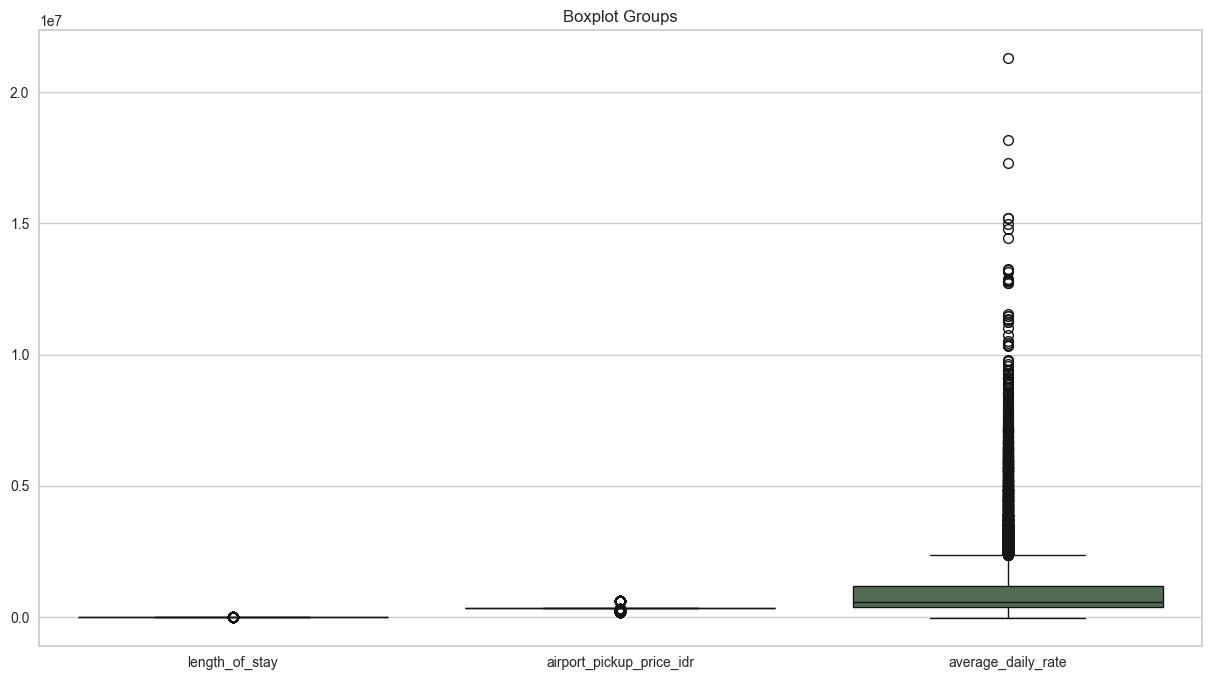

Lower, Upper Bounds, and Median for Quartiles:
+--------------------------+-------------+-------------+-----------+
|          Column          | Lower Bound | Upper Bound |   Median  |
+--------------------------+-------------+-------------+-----------+
|      length_of_stay      |     1.0     |     6.0     |    2.00   |
| airport_pickup_price_idr |   325000.0  |   325000.0  | 325000.00 |
|    average_daily_rate    |   357199.5  |  2374200.75 | 558818.00 |
+--------------------------+-------------+-------------+-----------+


In [111]:
columns = df[['length_of_stay', 'airport_pickup_price_idr','average_daily_rate']]
pal = ['#163020', '#3A4D39', '#4F6F52', '#739072', '#98BF97', '#B1DEAF', '#B9E8B7', '#C7F7C6']

plt.figure(figsize=(15, 8))
sns.boxplot(data=columns,palette=pal)
plt.title('Boxplot Groups')
plt.show()

table_bounds = PrettyTable()
table_bounds.field_names = ["Column", "Lower Bound", "Upper Bound", "Median"]

for column in columns.columns:
    Q1 = columns[column].quantile(0.25)
    Q2 = columns[column].median()
    Q3 = columns[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1
    upper_bound = Q3 + 1.5 * IQR

    table_bounds.add_row([column, f'{lower_bound}', f'{upper_bound}', f'{Q2:.2f}'])

print("Lower, Upper Bounds, and Median for Quartiles:")
print(table_bounds)

In [112]:
cols = [col for col in df.columns if df[col].dtype != 'object'][1:]
corr = df[cols].corr()

fig = ff.create_annotated_heatmap(
    z=corr.to_numpy().round(2),
    x=list(corr.index.values),
    y=list(corr.columns.values),       
    xgap=3, ygap=3,
    zmin=-1, zmax=1,
    colorscale='earth',
    colorbar_thickness=30,
    colorbar_ticklen=3,
)
fig.update_layout(title_text='<b>Correlation Matrix (cont. features)<b>',
                  title_x=0.5,
                  titlefont={'size': 24},
                  width=1000, height=750,
                  margin=dict(l=150, r=100, b=100, t=100),
                  xaxis_showgrid=False,
                  xaxis={'side': 'bottom'},
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed',                   
                  paper_bgcolor=None,
                  )
fig.show()


## **4 Data Pre-Prosessing**

**Data Pre-Prosessing** adalah tahapan untuk menghilangkan beberapa permasalahan yang bisa mengganggu saat pemrosesan data. Hal tersebut karena banyak data yang formatnya tidak konsisten. Data preprocessing merupakan teknik sebelum melakukan modeling.


penanganan outlier

In [113]:
def replace_outliers(column, lower_bound, upper_bound):
    mask = (column < lower_bound) | (column > upper_bound)
    column[mask] = column.clip(lower=lower_bound, upper=upper_bound)

# Define columns and their corresponding bounds
columns_and_bounds = {
    'average_daily_rate': (357199.5, 2374200.75 )}

# Replace outliers for each column
for column, (lower_bound, upper_bound) in columns_and_bounds.items():
    replace_outliers(raw_data['average_daily_rate'], lower_bound, upper_bound)


transformasi data check ini dan check out

In [114]:

raw_data['booking_check_in'] = pd.to_datetime(raw_data['booking_check_in'])
raw_data['booking_check_out'] = pd.to_datetime(raw_data['booking_check_out'])

def convert_to_minutes(time_str):
    if pd.isna(time_str):
        return None
    if 'hour' in time_str:
        hours = int(time_str.split()[0])
        return hours * 60
    elif 'minute' in time_str:
        minutes = int(time_str.split()[0])
        return minutes
    else:
        return None

raw_data['area_distance_to_airport'] = raw_data['area_distance_to_airport'].apply(convert_to_minutes)

raw_data['booking_check_in_date'] = raw_data['booking_check_in'].dt.day
raw_data['booking_check_in_month'] = raw_data['booking_check_in'].dt.month
raw_data['booking_check_in_year'] = raw_data['booking_check_in'].dt.year

raw_data['booking_check_out_date'] = raw_data['booking_check_out'].dt.day
raw_data['booking_check_out_month'] = raw_data['booking_check_out'].dt.month
raw_data['booking_check_out_year'] = raw_data['booking_check_out'].dt.year



In [115]:
raw_data = raw_data.drop(['booking_id','booking_check_in','booking_check_out','booking_received_timestamp','status','booking_window'
], axis = 1)


label encoder

In [117]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk kolom unit_id
raw_data['listing_id'] = label_encoder.fit_transform(raw_data['listing_id'])

raw_data['unit_id'] = label_encoder.fit_transform(raw_data['unit_id'])

raw_data['unit_id'] = label_encoder.fit_transform(raw_data['unit_id'])

raw_data['property_id'] = label_encoder.fit_transform(raw_data['property_id'])

raw_data['area_id'] = label_encoder.fit_transform(raw_data['area_id'])

raw_data['area_name'] = label_encoder.fit_transform(raw_data['area_name'])

print(raw_data[['unit_id','listing_id','property_id', 'area_id', 'area_name']].head())


   unit_id  listing_id  property_id  area_id  area_name
0      335        1817          154       11         13
1      334        1893          192       11         13
2      334        1893          192       11         13
3      335        1817          154       11         13
4      335        1817          154       11         13


cluster maping untuk data kategorik

In [118]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Memilih kolom yang akan digunakan untuk clustering
columns_for_clustering = ['bedroom', 'bathroom', 'beds', 'capacity','wifi','tv','cable_tv','ac','workspace','pool',
                          'parking','gym','kitchen']

# Mengisi nilai yang hilang sementara dengan SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(raw_data[columns_for_clustering])

# Normalisasi data sebelum clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Menentukan jumlah cluster (misalnya, 5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Menambahkan kolom cluster ke DataFrame asli
raw_data['cluster'] = clusters

# Mengisi nilai yang hilang dengan centroid dari masing-masing cluster
for column in columns_for_clustering:
    for cluster in range(5):
        cluster_mean = raw_data[raw_data['cluster'] == cluster][column].mean()
        raw_data.loc[(raw_data[column].isnull()) & (raw_data['cluster'] == cluster), column] = cluster_mean

# Mengecek kembali nilai yang hilang setelah imputasi
print("\nJumlah nilai yang hilang setelah imputasi:\n", raw_data.isnull().sum())

# Menghapus kolom cluster karena sudah tidak diperlukan
raw_data.drop(columns=['cluster'], inplace=True)


Jumlah nilai yang hilang setelah imputasi:
 booking_currency               0
listing_id                     0
length_of_stay                 0
average_daily_rate             0
unit_id                        0
bedroom                        0
bathroom                       0
beds                           0
capacity                       0
property_id                    0
wifi                           0
tv                             0
cable_tv                       0
ac                             0
workspace                      0
pool                           0
parking                        0
gym                            0
kitchen                        0
area_id                        0
area_name                      0
area_distance_to_airport    1469
airport_pickup_price_idr    8781
booking_check_in_date          0
booking_check_in_month         0
booking_check_in_year          0
booking_check_out_date         0
booking_check_out_month        0
booking_check_out_year         

In [119]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Memilih kolom yang akan digunakan untuk clustering
columns_for_clustering = ['booking_check_in_date','booking_check_in_month','booking_check_in_year',
                          'booking_check_in_year','booking_check_out_month','booking_check_out_year']

# Mengisi nilai yang hilang sementara dengan SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(raw_data[columns_for_clustering])

# Normalisasi data sebelum clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Menentukan jumlah cluster (misalnya, 5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Menambahkan kolom cluster ke DataFrame asli
raw_data['cluster'] = clusters

# Mengisi nilai yang hilang dengan centroid dari masing-masing cluster
for column in columns_for_clustering:
    for cluster in range(5):
        cluster_mean = raw_data[raw_data['cluster'] == cluster][column].mean()
        raw_data.loc[(raw_data[column].isnull()) & (raw_data['cluster'] == cluster), column] = cluster_mean

# Mengecek kembali nilai yang hilang setelah imputasi
print("\nJumlah nilai yang hilang setelah imputasi:\n", raw_data.isnull().sum())

# Menghapus kolom cluster karena sudah tidak diperlukan
raw_data.drop(columns=['cluster'], inplace=True)


Jumlah nilai yang hilang setelah imputasi:
 booking_currency               0
listing_id                     0
length_of_stay                 0
average_daily_rate             0
unit_id                        0
bedroom                        0
bathroom                       0
beds                           0
capacity                       0
property_id                    0
wifi                           0
tv                             0
cable_tv                       0
ac                             0
workspace                      0
pool                           0
parking                        0
gym                            0
kitchen                        0
area_id                        0
area_name                      0
area_distance_to_airport    1469
airport_pickup_price_idr    8781
booking_check_in_date          0
booking_check_in_month         0
booking_check_in_year          0
booking_check_out_date         0
booking_check_out_month        0
booking_check_out_year         

interative imputer untuk data numerik

In [120]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
columns_to_impute = [ 'airport_pickup_price_idr','area_distance_to_airport',]
imputer = IterativeImputer(max_iter=10, random_state=0)

# Memilih subset data untuk kolom-kolom yang akan diimputasi
data_to_impute = raw_data[columns_to_impute]

# Melakukan imputasi
data_imputed = imputer.fit_transform(data_to_impute)

# Mengganti nilai yang telah diimputasi kembali ke dataset asli
raw_data[columns_to_impute] = data_imputed

# Menampilkan hasil imputasi
print("Hasil imputasi untuk kolom area_distance_to_airport dan airport_pickup_price_idr:")
print(raw_data[columns_to_impute].head())
raw_data.isnull().sum()

Hasil imputasi untuk kolom area_distance_to_airport dan airport_pickup_price_idr:
   airport_pickup_price_idr  area_distance_to_airport
0                  325000.0                      45.0
1                  325000.0                      45.0
2                  325000.0                      45.0
3                  325000.0                      45.0
4                  325000.0                      45.0


booking_currency            0
listing_id                  0
length_of_stay              0
average_daily_rate          0
unit_id                     0
bedroom                     0
bathroom                    0
beds                        0
capacity                    0
property_id                 0
wifi                        0
tv                          0
cable_tv                    0
ac                          0
workspace                   0
pool                        0
parking                     0
gym                         0
kitchen                     0
area_id                     0
area_name                   0
area_distance_to_airport    0
airport_pickup_price_idr    0
booking_check_in_date       0
booking_check_in_month      0
booking_check_in_year       0
booking_check_out_date      0
booking_check_out_month     0
booking_check_out_year      0
dtype: int64

merubah jenis data untuk label

In [121]:
raw_data['average_daily_rate'] = raw_data['average_daily_rate'].astype('int64')

# Jika Anda ingin melihat hasilnya
print(raw_data['average_daily_rate'].dtypes)


int64


In [154]:
data=raw_data

In [124]:
data.isnull().sum()

booking_currency            0
listing_id                  0
length_of_stay              0
average_daily_rate          0
unit_id                     0
bedroom                     0
bathroom                    0
beds                        0
capacity                    0
property_id                 0
wifi                        0
tv                          0
cable_tv                    0
ac                          0
workspace                   0
pool                        0
parking                     0
gym                         0
kitchen                     0
area_id                     0
area_name                   0
area_distance_to_airport    0
airport_pickup_price_idr    0
booking_check_in_date       0
booking_check_in_month      0
booking_check_in_year       0
booking_check_out_date      0
booking_check_out_month     0
booking_check_out_year      0
dtype: int64

In [125]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur-fitur dan target
X = data.drop(columns=['average_daily_rate'])
y = data['average_daily_rate']

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan dimensi dari data latih dan data uji
print("Dimensi data latih:", X_train.shape, y_train.shape)
print("Dimensi data uji:", X_test.shape, y_test.shape)

Dimensi data latih: (45460, 28) (45460,)
Dimensi data uji: (11365, 28) (11365,)


In [127]:
y = data['average_daily_rate']
x = data.drop('average_daily_rate', axis=1)

In [130]:
#checking high skewed (> 0.5)
skew_check = x.apply(lambda x: abs(skew(x)))
skew_check = skew_check.reset_index(name='skew')
skewness = skew_check[skew_check['skew']>0.5]
skewed_feats = skewness['index']
skewness

,index,skew
0,booking_currency,1.332097
2,length_of_stay,33.478140
3,unit_id,0.585091
4,bedroom,2.225604
5,bathroom,3.878138
6,beds,3.325409
7,capacity,2.542168
9,wifi,10.565240
11,cable_tv,1.404153
12,ac,12.679391


In [131]:
from sklearn.preprocessing import MinMaxScaler
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Terapkan normalisasi Min-Max pada fitur numerik
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Gabungkan kembali fitur yang sudah dinormalisasi dengan label
data_normalized = pd.concat([x_scaled, y.reset_index(drop=True)], axis=1)

In [132]:
# apply polynomial since the features are not very linear with the label, and set the degree to 2 to prevent overfitting
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(x)

### MODELING

In [133]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd

class Model:
    def __init__(self, x, y, n_splits, repeated, rdm_seed, model, params):
        self.x = x
        self.y = y
        self.n_splits = n_splits
        self.repeated = repeated
        self.rdm_seed = rdm_seed
        self.model = model
        self.params = params
        self.cv_splitter = None
        self.best_model = None
        self.best_mae = float('inf')
        self.best_r2 = float('-inf')

    def split_data(self):
        cv = RepeatedKFold(n_splits=self.n_splits, n_repeats=self.repeated, random_state=self.rdm_seed)
        for fold, (train_idx, val_idx) in enumerate(cv.split(self.x, self.y)):
            X_train = self.x[train_idx]
            X_val = self.x[val_idx]
            y_train = self.y[train_idx]
            y_val = self.y[val_idx]
            yield X_train, X_val, y_train, y_val

    def fit(self, key):
        if key == 'knn':
            self._fit_knn()
        elif key == 'hist_gradient_boosting':
            self._fit_hist_gradient_boosting()
        elif key == 'decision_tree':
            self._fit_decision_tree()
        elif key == 'bagging':
            self._fit_bagging()
        elif key == 'adaboost':
            self._fit_adaboost()

    def _fit_knn(self):
        mae_per_fold = []
        r2_per_fold = []
        self.cv_splitter = self.split_data()

        for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
            model = KNeighborsRegressor(**self.params)
            model.fit(X_train, y_train)
            y_val_preds = model.predict(X_val)
            val_mae = mean_absolute_error(y_val, y_val_preds)
            val_r2 = r2_score(y_val, y_val_preds)

            if val_mae < self.best_mae:
                self.best_mae = val_mae
                self.best_model = model
            if val_r2 > self.best_r2:
                self.best_r2 = val_r2

            print(f"FOLD {fold} | MAE: {val_mae:.5f} | R²: {val_r2:.5f}")
            mae_per_fold.append(val_mae)
            r2_per_fold.append(val_r2)

        print(f"Average MAE across all folds knn: {np.mean(mae_per_fold):.5f}")
        print(f"Average R² across all folds knn: {np.mean(r2_per_fold):.5f}")

    def _fit_hist_gradient_boosting(self):
        mae_per_fold = []
        r2_per_fold = []
        self.cv_splitter = self.split_data()

        for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
            model = HistGradientBoostingRegressor(**self.params)
            model.fit(X_train, y_train)

            y_val_preds = model.predict(X_val)
            val_mae = mean_absolute_error(y_val, y_val_preds)
            val_r2 = r2_score(y_val, y_val_preds)

            if val_mae < self.best_mae:
                self.best_mae = val_mae
                self.best_model = model
            if val_r2 > self.best_r2:
                self.best_r2 = val_r2

            print(f"FOLD {fold} | MAE: {val_mae:.5f} | R²: {val_r2:.5f}")
            mae_per_fold.append(val_mae)
            r2_per_fold.append(val_r2)

        print(f"Average MAE across all folds hist gradient boosting: {np.mean(mae_per_fold):.5f}")
        print(f"Average R² across all folds hist gradient boosting: {np.mean(r2_per_fold):.5f}")

    def _fit_decision_tree(self):
        mae_per_fold = []
        r2_per_fold = []
        self.cv_splitter = self.split_data()

        for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
            model = DecisionTreeRegressor(**self.params)
            model.fit(X_train, y_train)

            y_val_preds = model.predict(X_val)
            val_mae = mean_absolute_error(y_val, y_val_preds)
            val_r2 = r2_score(y_val, y_val_preds)

            if val_mae < self.best_mae:
                self.best_mae = val_mae
                self.best_model = model
            if val_r2 > self.best_r2:
                self.best_r2 = val_r2

            print(f"FOLD {fold} | MAE: {val_mae:.5f} | R²: {val_r2:.5f}")
            mae_per_fold.append(val_mae)
            r2_per_fold.append(val_r2)

        print(f"Average MAE across all folds decision tree: {np.mean(mae_per_fold):.5f}")
        print(f"Average R² across all folds decision tree: {np.mean(r2_per_fold):.5f}")

    def _fit_bagging(self):
        mae_per_fold = []
        r2_per_fold = []
        self.cv_splitter = self.split_data()

        for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
            model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), **self.params)
            model.fit(X_train, y_train)
            y_val_preds = model.predict(X_val)
            val_mae = mean_absolute_error(y_val, y_val_preds)
            val_r2 = r2_score(y_val, y_val_preds)

            if val_mae < self.best_mae:
                self.best_mae = val_mae
                self.best_model = model
            if val_r2 > self.best_r2:
                self.best_r2 = val_r2

            print(f"FOLD {fold} | MAE: {val_mae:.5f} | R²: {val_r2:.5f}")
            mae_per_fold.append(val_mae)
            r2_per_fold.append(val_r2)

        print(f"Average MAE across all folds bagging: {np.mean(mae_per_fold):.5f}")
        print(f"Average R² across all folds bagging: {np.mean(r2_per_fold):.5f}")

    def _fit_adaboost(self):
        mae_per_fold = []
        r2_per_fold = []
        self.cv_splitter = self.split_data()

        for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
            model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), **self.params)
            model.fit(X_train, y_train)
            y_val_preds = model.predict(X_val)
            val_mae = mean_absolute_error(y_val, y_val_preds)
            val_r2 = r2_score(y_val, y_val_preds)

            if val_mae < self.best_mae:
                self.best_mae = val_mae
                self.best_model = model
            if val_r2 > self.best_r2:
                self.best_r2 = val_r2

            print(f"FOLD {fold} | MAE: {val_mae:.5f} | R²: {val_r2:.5f}")
            mae_per_fold.append(val_mae)
            r2_per_fold.append(val_r2)

        print(f"Average MAE across all folds adaboost: {np.mean(mae_per_fold):.5f}")
        print(f"Average R² across all folds adaboost: {np.mean(r2_per_fold):.5f}")

    def predict(self):
        self.cv_splitter = self.split_data()
        all_mae = []
        all_r2 = []
        all_mae_train = []
        all_r2_train = []
        y_preds_list = []
        y_val_list = []
        for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
            if self.best_model is None:
                raise ValueError("Model has not been trained yet. Call 'fit()' method first.")
            else:
                y_preds = self.best_model.predict(X_val)
                mae = mean_absolute_error(y_val, y_preds)
                r2 = r2_score(y_val, y_preds)
                all_mae.append(mae)
                all_r2.append(r2)
                y_preds_list.append(y_preds)
                y_val_list.append(y_val)

                train_preds = self.best_model.predict(X_train)
                train_mae = mean_absolute_error(y_train, train_preds)
                train_r2 = r2_score(y_train, train_preds)
                all_mae_train.append(train_mae)
                all_r2_train.append(train_r2)
                print(f"FOLD {fold} | MAE Val: {mae:.5f} | R² Val: {r2:.5f} | MAE Train: {train_mae:.5f} | R² Train: {train_r2:.5f}")

        avg_mae = np.mean(all_mae)
        avg_r2 = np.mean(all_r2)
        avg_mae_train = np.mean(all_mae_train)
        avg_r2_train = np.mean(all_r2_train)
        print(f'Average MAE Val: {avg_mae:.5f} | Average R² Val: {avg_r2:.5f} | Average MAE Train: {avg_mae_train:.5f} | Average R² Train: {avg_r2_train:.5f}')
        return all_mae, all_r2, y_preds_list, y_val_list

    def feature_importance(self):
        if hasattr(self.best_model, 'feature_importances_'):
            feature_importances = self.best_model.feature_importances_
            feature_names = list(x.columns)
            feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
            feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)
            return feature_importances_df
        else:
            raise ValueError("The best model does not support feature importance")

    def inverse(self, y_preds, y_val):
        y_preds = np.expm1(y_preds)
        y_val = np.expm1(y_val)
        return y_preds, y_val

# Siapkan data

# Memisahkan fitur-fitur dan target
X = data.drop(columns=['average_daily_rate'])
y = data['average_daily_rate']

# Definisikan parameter model
params_knn = {'n_neighbors': 5}
params_hgb = {'max_iter': 100, 'learning_rate': 0.1, 'random_state': 42}
params_dt = {'random_state': 42}
params_bagging = {'n_estimators': 100, 'random_state': 42}
params_adaboost = {'n_estimators': 100, 'random_state': 42}

# Inisialisasi model
model_knn = Model(X.values, y.values, n_splits=5, repeated=2, rdm_seed=42, model='knn', params=params_knn)
model_hgb = Model(X.values, y.values, n_splits=5, repeated=2, rdm_seed=42, model='hist_gradient_boosting', params=params_hgb)
model_dt = Model(X.values, y.values, n_splits=5, repeated=2, rdm_seed=42, model='decision_tree', params=params_dt)
model_bagging = Model(X.values, y.values, n_splits=5, repeated=2, rdm_seed=42, model='bagging', params=params_bagging)
model_adaboost = Model(X.values, y.values, n_splits=5, repeated=2, rdm_seed=42, model='adaboost', params=params_adaboost)

# Fit model
model_knn.fit('knn')
model_hgb.fit('hist_gradient_boosting')
model_dt.fit('decision_tree')
model_bagging.fit('bagging')
model_adaboost.fit('adaboost')

# Prediksi
mae_knn, r2_knn, preds_knn, y_vals_knn = model_knn.predict()
mae_hgb, r2_hgb, preds_hgb, y_vals_hgb = model_hgb.predict()
mae_dt, r2_dt, preds_dt, y_vals_dt = model_dt.predict()
mae_bagging, r2_bagging, preds_bagging, y_vals_bagging = model_bagging.predict()
mae_adaboost, r2_adaboost, preds_adaboost, y_vals_adaboost = model_adaboost.predict()





# Stack prediksi sebagai fitur baru untuk meta model
stacked_features_train = np.column_stack((preds_knn[0], preds_hgb[0], preds_dt[0], preds_bagging[0], preds_adaboost[0]))
stacked_features_val = np.column_stack((preds_knn[1], preds_hgb[1], preds_dt[1], preds_bagging[1], preds_adaboost[1]))

# Definisikan model meta menggunakan RandomForestRegressor
meta_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Latih meta model
meta_model.fit(stacked_features_train, y_vals_knn[0])

# Prediksi menggunakan meta model
final_preds = meta_model.predict(stacked_features_val)

# Evaluasi model meta
final_mae = mean_absolute_error(y_vals_knn[1], final_preds)
final_r2 = r2_score(y_vals_knn[1], final_preds)
print(f'Final MAE: {final_mae:.5f} | Final R²: {final_r2:.5f}')

# Feature importance dari meta model
feature_importances = meta_model.feature_importances_
feature_names = ['KNN', 'HistGradientBoosting', 'DecisionTree', 'Bagging', 'AdaBoost']
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

print(feature_importances_df)



FOLD 0 | MAE: 163041.48306 | R²: 0.77464
FOLD 1 | MAE: 163841.09894 | R²: 0.77799
FOLD 2 | MAE: 163906.10390 | R²: 0.77027
FOLD 3 | MAE: 167010.96905 | R²: 0.75092
FOLD 4 | MAE: 158910.48996 | R²: 0.79009
FOLD 5 | MAE: 162974.26812 | R²: 0.77222
FOLD 6 | MAE: 162519.29983 | R²: 0.76958
FOLD 7 | MAE: 161409.81645 | R²: 0.77925
FOLD 8 | MAE: 165735.02416 | R²: 0.76907
FOLD 9 | MAE: 164326.17130 | R²: 0.77164
Average MAE across all folds knn: 163367.47248
Average R² across all folds knn: 0.77257
FOLD 0 | MAE: 193816.59366 | R²: 0.75853
FOLD 1 | MAE: 197372.26661 | R²: 0.75582
FOLD 2 | MAE: 194975.20835 | R²: 0.76015
FOLD 3 | MAE: 199042.69954 | R²: 0.73752
FOLD 4 | MAE: 195040.83087 | R²: 0.76346
FOLD 5 | MAE: 197087.21918 | R²: 0.75061
FOLD 6 | MAE: 193189.62457 | R²: 0.75809
FOLD 7 | MAE: 192937.95743 | R²: 0.76479
FOLD 8 | MAE: 193148.10331 | R²: 0.75941
FOLD 9 | MAE: 198859.77855 | R²: 0.74380
Average MAE across all folds hist gradient boosting: 195547.02821
Average R² across all fold

bisa diambil kesimpulan dengan teknik stacking dengan:

- meta model = random forest 
- base model = decision tree,knn,bagging,ada boost,HistGradientBoosting

berhasil menangani data tersebut dengan matriks evaluasi
- Average MAE Val: 29893.39485 | Average R² Val: 0.96070 
- Average MAE Train: 29893.39485 | Average R² Train: 0.96071
- Final MAE: 13432.09237 | Final R²: 0.99254

dan base model yang sangat robust untuk data tersebut adalah bagging dengan besaran features importance

- KNN    0.000802
- HistGradientBoosting    0.001370
- DecisionTree    0.045023
- Bagging    0.875457
- AdaBoost    0.077349






### Features Importance

Feature importances for AdaBoost model:
                     feature  importance
1                 listing_id    0.164118
3                    unit_id    0.097496
20  area_distance_to_airport    0.091949
8                property_id    0.075996
25    booking_check_out_date    0.073704
22     booking_check_in_date    0.071663
2             length_of_stay    0.049653
26   booking_check_out_month    0.049529
23    booking_check_in_month    0.048687
7                   capacity    0.047590
19                 area_name    0.033432
5                   bathroom    0.028718
0           booking_currency    0.025891
24     booking_check_in_year    0.019797
4                    bedroom    0.018653
18                   area_id    0.018598
27    booking_check_out_year    0.016913
21  airport_pickup_price_idr    0.015205
14                      pool    0.010450
17                   kitchen    0.009967
10                        tv    0.007758
6                       beds    0.007191
11               

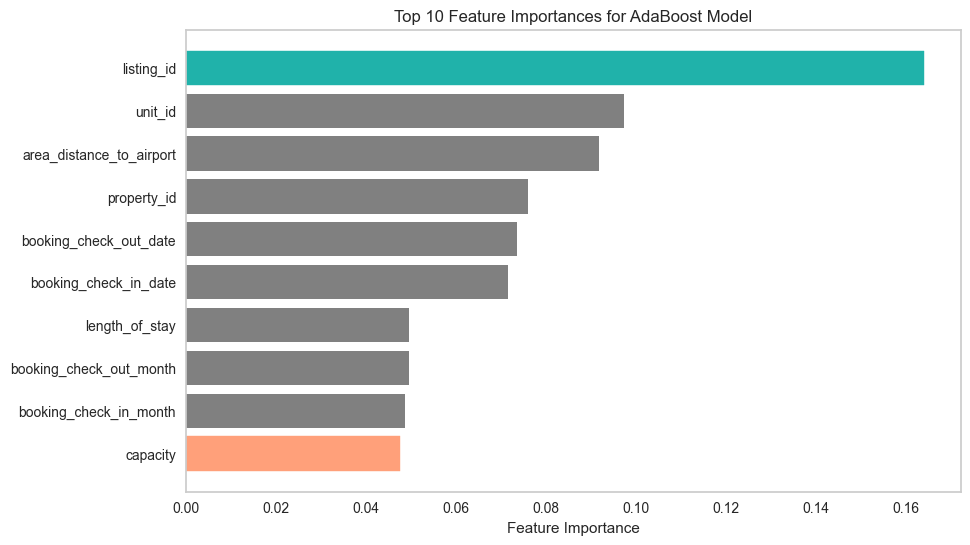

In [152]:
import matplotlib.pyplot as plt

# Asumsi model_adaboost sudah di-fit dan siap digunakan untuk mengambil feature importances
print("Feature importances for AdaBoost model:")
feature_importances_adaboost = model_adaboost.feature_importance()
print(feature_importances_adaboost)

# Membuat bar chart untuk feature importances
if isinstance(feature_importances_adaboost, pd.DataFrame):
    # Ambil 10 fitur teratas
    top_10_features = feature_importances_adaboost.nlargest(10, 'importance')

    fig, ax = plt.subplots(figsize=(10, 6))

    bars = ax.barh(top_10_features['feature'], top_10_features['importance'], color='gray')
    
    # Warna khusus untuk fitur terpenting dan fitur terakhir
    bars[0].set_color('lightseagreen')
    bars[-1].set_color('lightsalmon')

    ax.set_xlabel('Feature Importance')
    ax.set_title('Top 10 Feature Importances for AdaBoost Model')
    ax.invert_yaxis()  # Membalik sumbu y agar fitur dengan importance tertinggi berada di atas
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)

    plt.show()
else:
    print("The best model does not support feature importance or there was an error.")


Feature importances for AdaBoost model:
                     feature  importance
1                 listing_id    0.225244
20  area_distance_to_airport    0.191835
7                   capacity    0.083721
5                   bathroom    0.073061
3                    unit_id    0.065328
8                property_id    0.054223
19                 area_name    0.053272
0           booking_currency    0.042688
25    booking_check_out_date    0.032645
22     booking_check_in_date    0.031141
26   booking_check_out_month    0.026017
23    booking_check_in_month    0.025302
2             length_of_stay    0.019203
18                   area_id    0.018560
24     booking_check_in_year    0.010991
27    booking_check_out_year    0.008494
10                        tv    0.008280
4                    bedroom    0.006829
6                       beds    0.006019
14                      pool    0.004073
17                   kitchen    0.003772
21  airport_pickup_price_idr    0.003213
11               

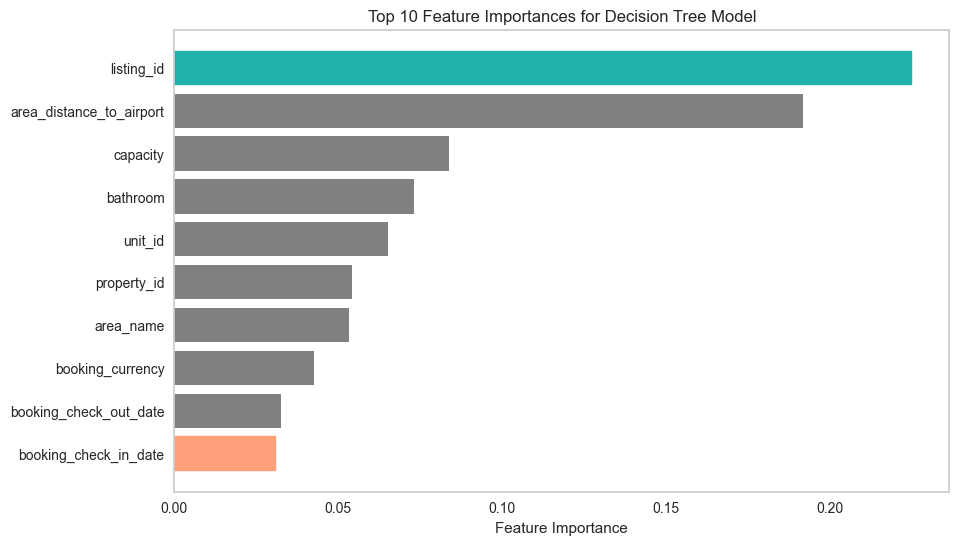

In [153]:
import matplotlib.pyplot as plt

# Asumsi model_adaboost sudah di-fit dan siap digunakan untuk mengambil feature importances
print("Feature importances for AdaBoost model:")
feature_importances_dt = model_dt.feature_importance()
print(feature_importances_dt)

# Membuat bar chart untuk feature importances
if isinstance(feature_importances_dt, pd.DataFrame):
    # Ambil 10 fitur teratas
    top_10_features = feature_importances_dt.nlargest(10, 'importance')

    fig, ax = plt.subplots(figsize=(10, 6))

    bars = ax.barh(top_10_features['feature'], top_10_features['importance'], color='gray')
    
    # Warna khusus untuk fitur terpenting dan fitur terakhir
    bars[0].set_color('lightseagreen')
    bars[-1].set_color('lightsalmon')

    ax.set_xlabel('Feature Importance')
    ax.set_title('Top 10 Feature Importances for Decision Tree Model')
    ax.invert_yaxis()  # Membalik sumbu y agar fitur dengan importance tertinggi berada di atas
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)

    plt.show()
else:
    print("The best model does not support feature importance or there was an error.")


In [143]:

print("Feature importances for AdaBoost model:")
print(model_adaboost.feature_importance())

Feature importances for AdaBoost model:
                     feature  importance
1                 listing_id    0.164118
3                    unit_id    0.097496
20  area_distance_to_airport    0.091949
8                property_id    0.075996
25    booking_check_out_date    0.073704
22     booking_check_in_date    0.071663
2             length_of_stay    0.049653
26   booking_check_out_month    0.049529
23    booking_check_in_month    0.048687
7                   capacity    0.047590
19                 area_name    0.033432
5                   bathroom    0.028718
0           booking_currency    0.025891
24     booking_check_in_year    0.019797
4                    bedroom    0.018653
18                   area_id    0.018598
27    booking_check_out_year    0.016913
21  airport_pickup_price_idr    0.015205
14                      pool    0.010450
17                   kitchen    0.009967
10                        tv    0.007758
6                       beds    0.007191
11               